<a href="https://colab.research.google.com/github/Jun-Liu-291/10-Animals/blob/master/Animals_10_v1_learning_rate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [ ]:
import tensorflow as tf 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
import numpy as np

In [ ]:
import os

BASE_PATH = '/content/drive/My Drive/dataset/tenAnimals'
TRAIN_PATH = os.path.join(BASE_PATH, 'train')
VAL_PATH = os.path.join(BASE_PATH, 'validation')
TEST_PATH = os.path.join(BASE_PATH, 'test')

batch_size = 128
epochs = 30
IMG_HEIGHT = 128
IMG_WIDTH = 128

In [ ]:
train_image_generator = ImageDataGenerator(
    rescale = 1./ 255,
    #rotation_range = 30,
    #width_shift_range = .15,
    #height_shift_range = .15,
    #horizontal_flip = True,
    #zoom_range = 0.3
)

validation_image_generator = ImageDataGenerator(rescale=1./255)

In [ ]:
train_data_gen = train_image_generator.flow_from_directory(
    batch_size = batch_size,
    directory = TRAIN_PATH,
    shuffle = True,
    target_size = (IMG_HEIGHT, IMG_WIDTH),
    class_mode = 'categorical'
)

validation_data_gen = validation_image_generator.flow_from_directory(
    batch_size = batch_size,
    directory = VAL_PATH,
    shuffle = True,
    target_size = (IMG_HEIGHT, IMG_WIDTH),
    class_mode = 'categorical'
)

Found 10240 images belonging to 10 classes.
Found 1280 images belonging to 10 classes.


In [ ]:

# model architcture
model = Sequential([Conv2D(64, 3, padding = 'same', activation = 'relu', input_shape = (IMG_HEIGHT, IMG_WIDTH,3)),
                    Conv2D(64, 3, padding = 'same', activation = 'relu'),
                    MaxPooling2D(),
                    Conv2D(128, 3, padding = 'same', activation = 'relu'),
                    Conv2D(128, 3, padding = 'same', activation = 'relu'),
                    MaxPooling2D(),
                    Conv2D(256, 3, padding = 'same', activation = 'relu'),
                    Conv2D(256, 3, padding = 'same', activation = 'relu'),
                    MaxPooling2D(),
                    Conv2D(512, 3, padding = 'same', activation = 'relu'),
                    Conv2D(512, 3, padding = 'same', activation = 'relu'),
                    Conv2D(512, 3, padding = 'same', activation = 'relu'),
                    MaxPooling2D(),
                    Conv2D(1024, 3, padding = 'same', activation = 'relu'),
                    Conv2D(1024, 3, padding = 'same', activation = 'relu'),
                    Conv2D(1024, 3, padding = 'same', activation = 'relu'),
                    MaxPooling2D(),
                    Flatten(),
                    Dropout(0.4),
                    Dense(1024, activation='relu'),
                    Dense(1024, activation='relu'),
                    Dense(10, activation='softmax')])

# setting the optimizer and learning rate
learning_rate = 1e-5
optimizer = tf.optimizers.RMSprop(learning_rate = 1e-5, momentum=.9)
  
# Compile the model with the optimizer and learning rate specified in hpyarams
model.compile(optimizer = optimizer,
              loss = 'categorical_crossentropy',
              metrics = ['acc'])
  
# set learning rate by different epochs
lr_schedule = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-5 * 10**(epoch / 10))



In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 64)      1792      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 128, 128, 64)      36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 64, 128)       73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 64, 64, 128)       147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 32, 32, 256)       2

In [ ]:
# Fit the model
history = model.fit_generator(
    train_data_gen,
    steps_per_epoch = int(10240/batch_size),
    epochs = epochs,
    validation_data = validation_data_gen,
    validation_steps = int(1280/batch_size),
    callbacks = [lr_schedule]
)


Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/30
80/80 [==============================] - 4075s 51s/step - loss: 2.3024 - acc: 0.1089 - val_loss: 2.3010 - val_acc: 0.1063 - lr: 1.0000e-05
Epoch 2/30
80/80 [==============================] - 53s 661ms/step - loss: 2.2597 - acc: 0.1423 - val_loss: 2.1440 - val_acc: 0.1813 - lr: 1.2589e-05
Epoch 3/30
80/80 [==============================] - 54s 674ms/step - loss: 2.1352 - acc: 0.1960 - val_loss: 2.0501 - val_acc: 0.2281 - lr: 1.5849e-05
Epoch 4/30
80/80 [==============================] - 54s 677ms/step - loss: 2.0274 - acc: 0.2569 - val_loss: 1.9367 - val_acc: 0.3180 - lr: 1.9953e-05
Epoch 5/30
80/80 [==============================] - 54s 680ms/step - loss: 1.8589 - acc: 0.3301 - val_loss: 1.7661 - val_acc: 0.3680 - lr: 2.5119e-05
Epoch 6/30
80/80 [==============================] - 55s 685ms/step - loss: 1.7007 - acc: 0.3933 - val_loss: 1.6179 - val_acc: 0.4125 - lr: 3.1623e-05
Epoch 7/30
80/80 [======

(1e-05, 0.01, 1.0, 2.9)

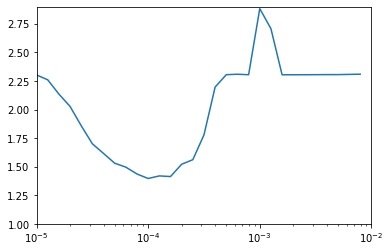

In [ ]:
import matplotlib.pyplot as plt
plt.semilogx(history.history["lr"], history.history["loss"])
plt.axis([1e-5, 1e-2, 1, 2.9])